# **FoodHub Data Analysis**

By Deepikaa Sriram

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')  

### Understanding the structure of the data

In [5]:
df = pd.read_csv('foodhub_order.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
df.shape

(1898, 9)

#### Observations:

The data has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Four of the columns (order_id, customer_id, food_preparation_time, delivery_time) contain integer values, as indicated by the Dtype **int64**. 

Four columns (restaurant_name, cuisine_type, day_of_the_week, and rating) have strings/mixed numeric and non-numeric values, as indicated by the Dtype **object**. 

One column (cost_of_the_order) has numerical values with decimal points, as indicated by the Dtype **float64**. 

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
df_copy=df.copy()
df_copy.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [10]:
df_copy.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
Logically, looking at the data pulled from Question 2, we see that there are 1898 non-null values in each column in the dataset. Given there are a total of 1898 rows, **we can assume there are no NaN values/missing values in the dataset.** 

However, to verify this assumption, you can import a new dataset, titled "df_copy", and calculate the number of missing values in each column using the **.isnull** function. Creating a copy of the data also ensures you do not modify the original dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
df.agg({'food_preparation_time':['min','max','mean']})

,food_preparation_time
min,20.00000
max,35.00000
mean,27.37197


#### Observations:
We can calculate a statistical summary of the data using the .agg function. Based on this, we see that it takes a **minimum of 20 minutes**, a **maximum of 35 minutes**, and an **average of 27.37 minutes** to prepare the food after an order is placed. 

### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
count = df_copy['rating'].eq("Not given").sum()
print(count)

736


#### Observations:

To count the occurrences of the string "not given" in the column "rating" of the dataframe, I utilized the eq() method, which compares each value in the "rating" column to the string "Not given" and returns a Boolean Series. The sum () method sums up the True values in the Boolean Series and gives us the total occurences of "Not given". 

Essentially, this means that **736 orders were not rated**, which is approx. 38.7% of orders. 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [13]:
df_copy.cuisine_type.value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

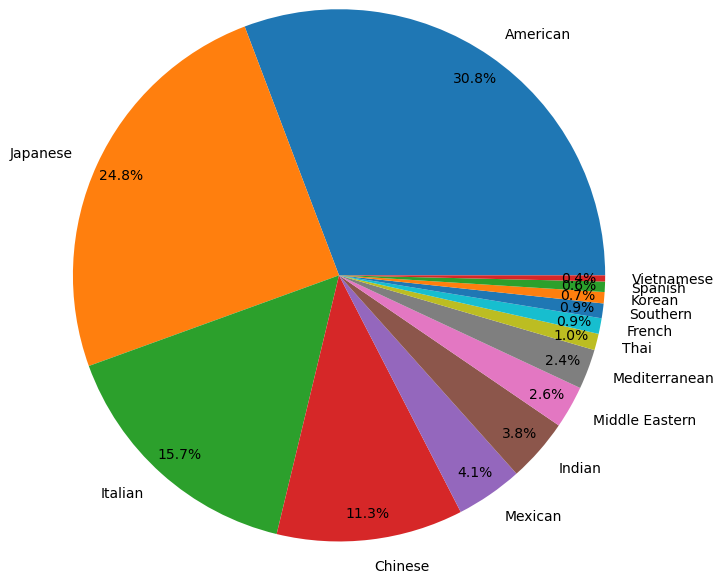

In [14]:
plt.pie(df_copy.cuisine_type.value_counts(), autopct = '%.1f%%', radius = 1.8, labels = ['American', 'Japanese','Italian','Chinese', 'Mexican', 'Indian', 'Middle Eastern', 'Mediterranean', 'Thai', 'French', 'Southern', 'Korean','Spanish', 'Vietnamese'], pctdistance=0.9)

plt.show()

Type of cuisine is a categorical variable, which can be explored through a pie plot. This pie plot visualizes the percentage of types of cuisine offered. We can see that American cuisine accounts for the most orders, comprising 30.8% of all orders. Vietnamese cuisine accounts for the fewest number of orders, comprising 0.4% of all orders. 

In [15]:
df_copy.day_of_the_week.value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

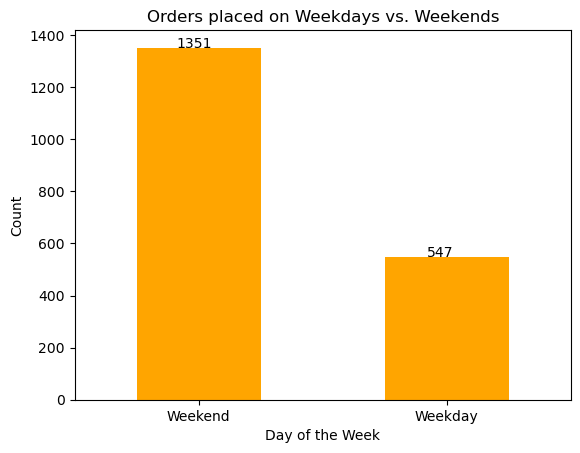

In [16]:
df_copy.day_of_the_week.value_counts().plot(kind='bar', rot = 0, color = 'orange')

plt.text(x = -0.09, y = df_copy.day_of_the_week.value_counts()[0]+1, s = df_copy.day_of_the_week.value_counts()[0])
plt.text(x = 0.92, y = df_copy.day_of_the_week.value_counts()[1]+1, s = df_copy.day_of_the_week.value_counts()[1])


plt.title('Orders placed on Weekdays vs. Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

plt.show()

"Day of the week" is a categorical variable that can best be visualized as a box plot. Here we see that most orders were placed on the weekend. 

In [17]:
df_copy.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

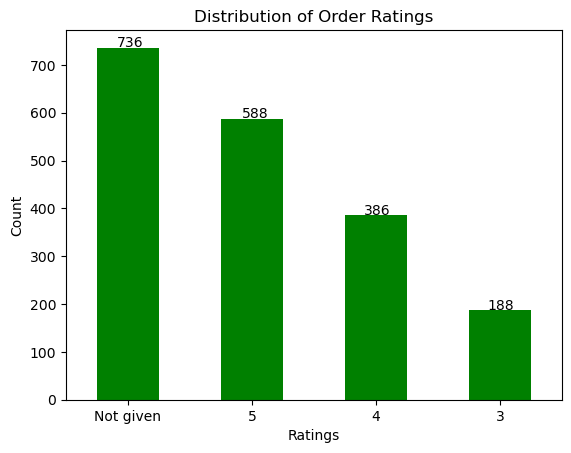

In [18]:
df_copy.rating.value_counts().plot(kind='bar', rot = 0, color = 'green')

plt.text(x = -0.09, y = df_copy.rating.value_counts()[0]+1, s = df_copy.rating.value_counts()[0])
plt.text(x = 0.92, y = df_copy.rating.value_counts()[1]+1, s = df_copy.rating.value_counts()[1])
plt.text(x = 1.9, y = df_copy.rating.value_counts()[2]+1, s = df_copy.rating.value_counts()[2])
plt.text(x = 2.9, y = df_copy.rating.value_counts()[3]+1, s = df_copy.rating.value_counts()[3])


plt.title('Distribution of Order Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')

plt.show()

Rating is a discrete variable that can best be visualized as a box plot. Here we see that the majority of orders were not given a rating. 

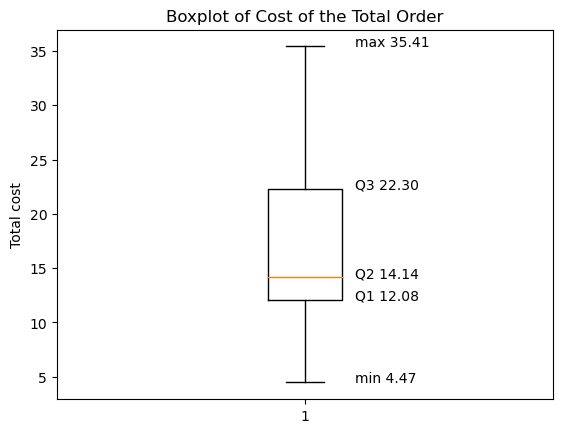

In [19]:
plt.boxplot(df_copy['cost_of_the_order'])

plt.text(x=1.1, y=df_copy['cost_of_the_order'].min(), s=f'min {df_copy["cost_of_the_order"].min():.2f}')
plt.annotate(f'Q1 {df_copy["cost_of_the_order"].quantile(0.25):.2f}', xy=(1, df_copy['cost_of_the_order'].quantile(0.25)), xytext=(1.1, df_copy['cost_of_the_order'].quantile(0.25)), ha='left')
plt.annotate(f'Q2 {df_copy["cost_of_the_order"].median():.2f}', xy=(1, df_copy['cost_of_the_order'].median()), xytext=(1.1, df_copy['cost_of_the_order'].median()), ha='left')
plt.annotate(f'Q3 {df_copy["cost_of_the_order"].quantile(0.75):.2f}', xy=(1, df_copy['cost_of_the_order'].quantile(0.75)), xytext=(1.1, df_copy['cost_of_the_order'].quantile(0.75)), ha='left')
plt.text(x=1.1, y=df_copy['cost_of_the_order'].max(), s=f'max {df_copy["cost_of_the_order"].max():.2f}')

plt.title('Boxplot of Cost of the Total Order')
plt.ylabel('Total cost')

plt.show()

**Observations:** The cost of the order is a continuous variable, which can be explored through a box plot. The data appears to be positively skewed, with the majority of costs falling between 12.08 and 22.30. The median cost is 14.14. 

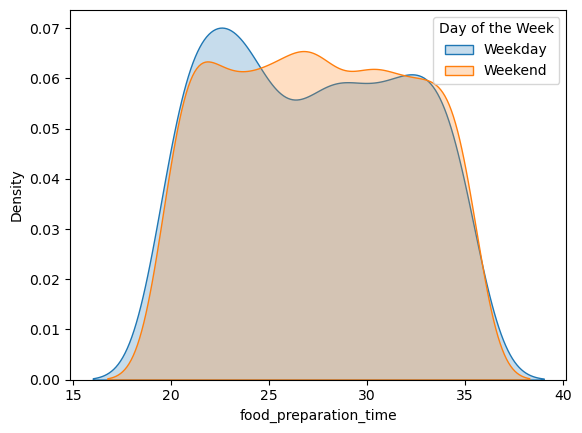

In [21]:
day_of_the_week = ['Weekday', 'Weekend']

for i in day_of_the_week:
    subset = df_copy[df_copy['day_of_the_week'] == i]

    sns.distplot(subset['food_preparation_time'], hist = False, kde = True,
                  kde_kws = {'shade':True},
                  label = i)
plt.legend(title='Day of the Week', loc='upper right')


**Observations:** Given that time is a continuous variable, I created a density plot to explore whether there are apparent differences in food preparation time on weekdays as opposed to weekends. Based on this density plot, we can see that there does not appear to be a significant difference in the food preparation time. 

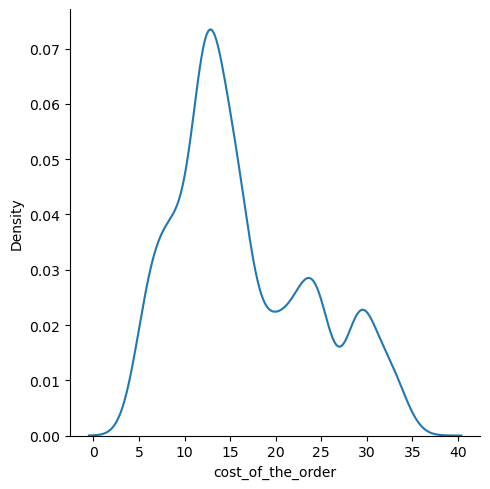

In [22]:
sns.displot(df_copy['cost_of_the_order'], kind='kde')
plt.show()

**Observations:** The cost of the order appears skewed to the right and peaks at approximately $13. 

In [23]:
df_copy.restaurant_name.value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

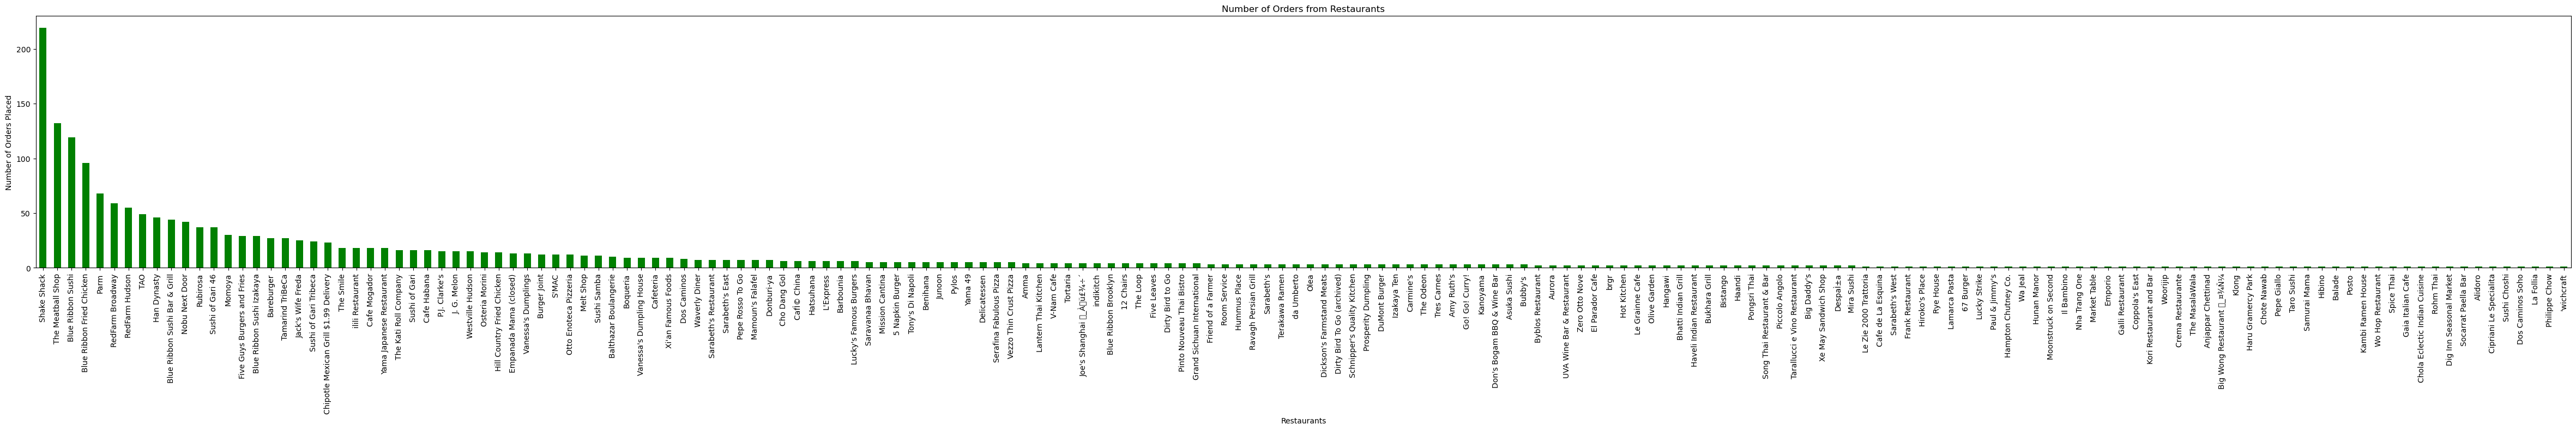

In [24]:
fig, ax = plt.subplots(figsize=(60, 6))

df_copy.restaurant_name.value_counts().plot(kind='bar', rot = 90, color = 'green')

plt.title('Number of Orders from Restaurants')
plt.xlabel('Restaurants')
plt.ylabel('Number of Orders Placed')

plt.show()

**Observation:** This is not a user-friendly way to visualize the **restaurant_name** data. Given that there are 178 different restaurants, we might be better suited to either visualize the most popular restaurants based on each cuisine or choose a smaller sample (i.e. the top 10 restaurants) to plot. Similarly, visualizing all values of **customer_ID** and **order_ID** would also not be a user-friendly method of visualization. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [25]:
# Write the code here
df_top5=df_copy.restaurant_name.value_counts()
df_top5.head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. 

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [26]:
df_weekend = df_copy[df_copy['day_of_the_week'] == 'Weekend']

df_weekend.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22


In [27]:
df_weekend.cuisine_type.value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

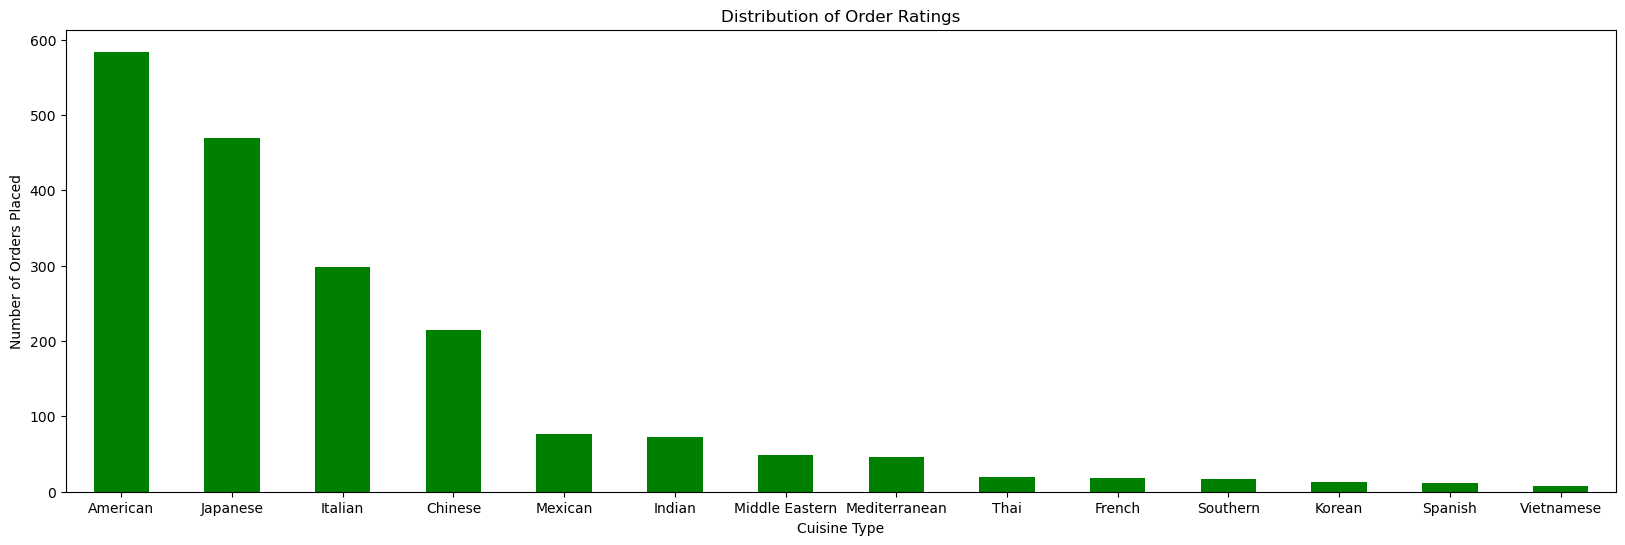

In [28]:
fig, ax = plt.subplots(figsize=(20, 6))

df_copy.cuisine_type.value_counts().plot(kind='bar', rot = 0, color = 'green')

plt.title('Distribution of Order Ratings')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders Placed')

plt.show()

#### Observations:
To calculate this, I created a new dataset that had only values with the day_of_the_week listed as "Weekend". Then, I calculated the value_counts of each cuisine_type ordered on the weekend to determine which cuisine was ordered the most. 

The most popular cuisine on weekends is American cuisine, with 415 orders noted in the dataset. 

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [29]:
# Write the code here
df_order20 = df_copy[df_copy['cost_of_the_order'] >= 20]
df_order20.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22


In [30]:
df_order20 = (sum(df_copy['cost_of_the_order'] >= 20) / 1898) * 100

print(f"{df_order20:.2f}%")


29.24%


#### Observations:
The percentage of orders that cost more than 20 is equal to the (total number of orders >= 20) divided by (the total number of orders - which we previously calculated to be 1898) multiplied by 100. To calculate this, I created a unique list that would calculate this formula and printed the total calculation pushed out by 2 decimal places by using the modifier .2f . 


29.24% of orders cost more than $20. 

### **Question 10**: What is the mean order delivery time? [1 mark]

In [31]:
# Write the code here
df.agg({'delivery_time':['mean']})

,delivery_time
mean,24.161749


#### Observations:
We can calculate the average delivery time by using the .agg function. 
The average delivery time is approximately 24.16 minutes. 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [32]:
# Write the code here
df_copy.customer_id.value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:
Using the value_counts function, we can see that customer 52832, 83287, and 250494 have the highest total orders placed, which make them the most frequent customers. 

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


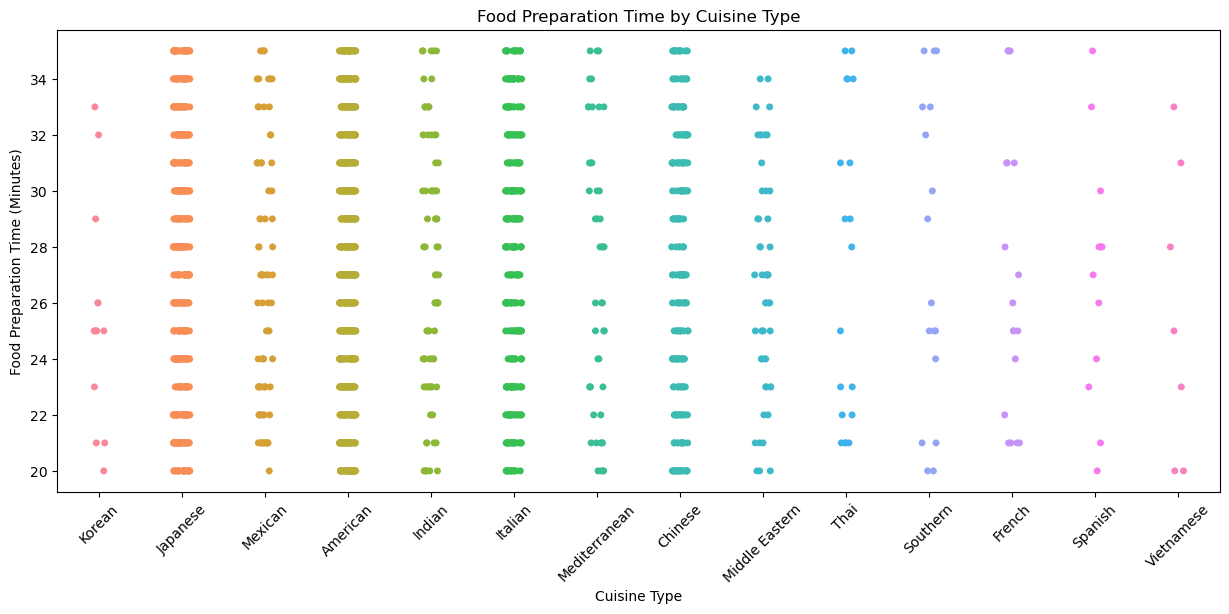

In [33]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.stripplot(y = 'food_preparation_time', x = 'cuisine_type', data = df_copy, jitter=True)

plt.xticks(rotation=45)

plt.title('Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time (Minutes)')

plt.show()

**Observation:** I wanted to explore whether particular cuisines take longer to prepare. Since food_preparation_time is a continuous variable, but cuisine_type is a categorical variable, a strip plot can be a good way to explore this data. I added jitter to increase the spread of data as well using the function "Jitter=True". This strip plot does not appear to indicate that one cuisine may take longer to prepare as opposed to another. 

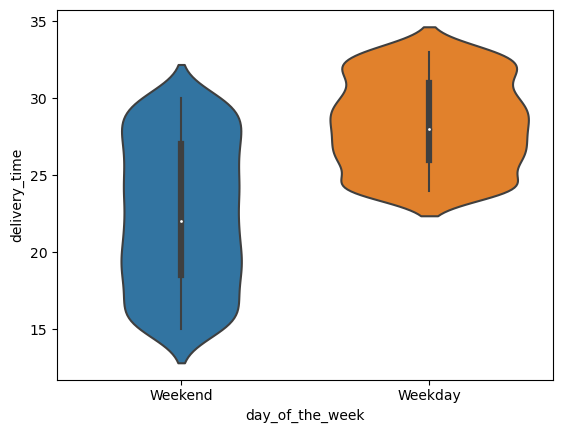

In [34]:
sns.violinplot(y = 'delivery_time', x = 'day_of_the_week', data = df_copy, jitter=True)
plt.show()

**Observation:** I wanted to explore whether delivery times are faster or slower depending on the day of the week. Since delivery_time is a continuous variable, and day_of_the_week is a categorical variable, this can be visualized on a violin plot. Based on this plot, we can see draw the following conjectures: 
1. Delivery time on weekdays are higher than on the weekend. 
2. Delivery time is more variable on the weekend.
3. The spread of the data is relatively even across the range of times on the weekend and weekday, indicated by the even thickness of the body of the violin plot. 

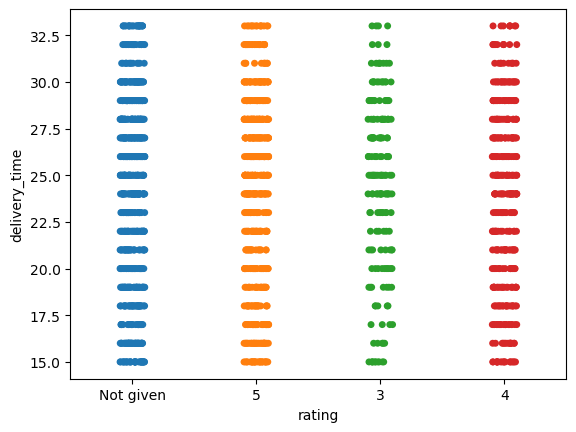

In [35]:
# swarm plot
sns.stripplot(y = 'delivery_time', x = 'rating', data = df_copy, jitter=True)

# display the plot
plt.show()

**Observation:** I wanted to explore the relationship between rating and delivery time. Given that rating is categorical and delivery time is continuous, a strip plot is a good way to explore this data. Based on the strip plot, it does not appear that the two variables are related. 

In [36]:
corr_matrix = df_copy.corr()

corr_matrix

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


<Figure size 800x800 with 0 Axes>

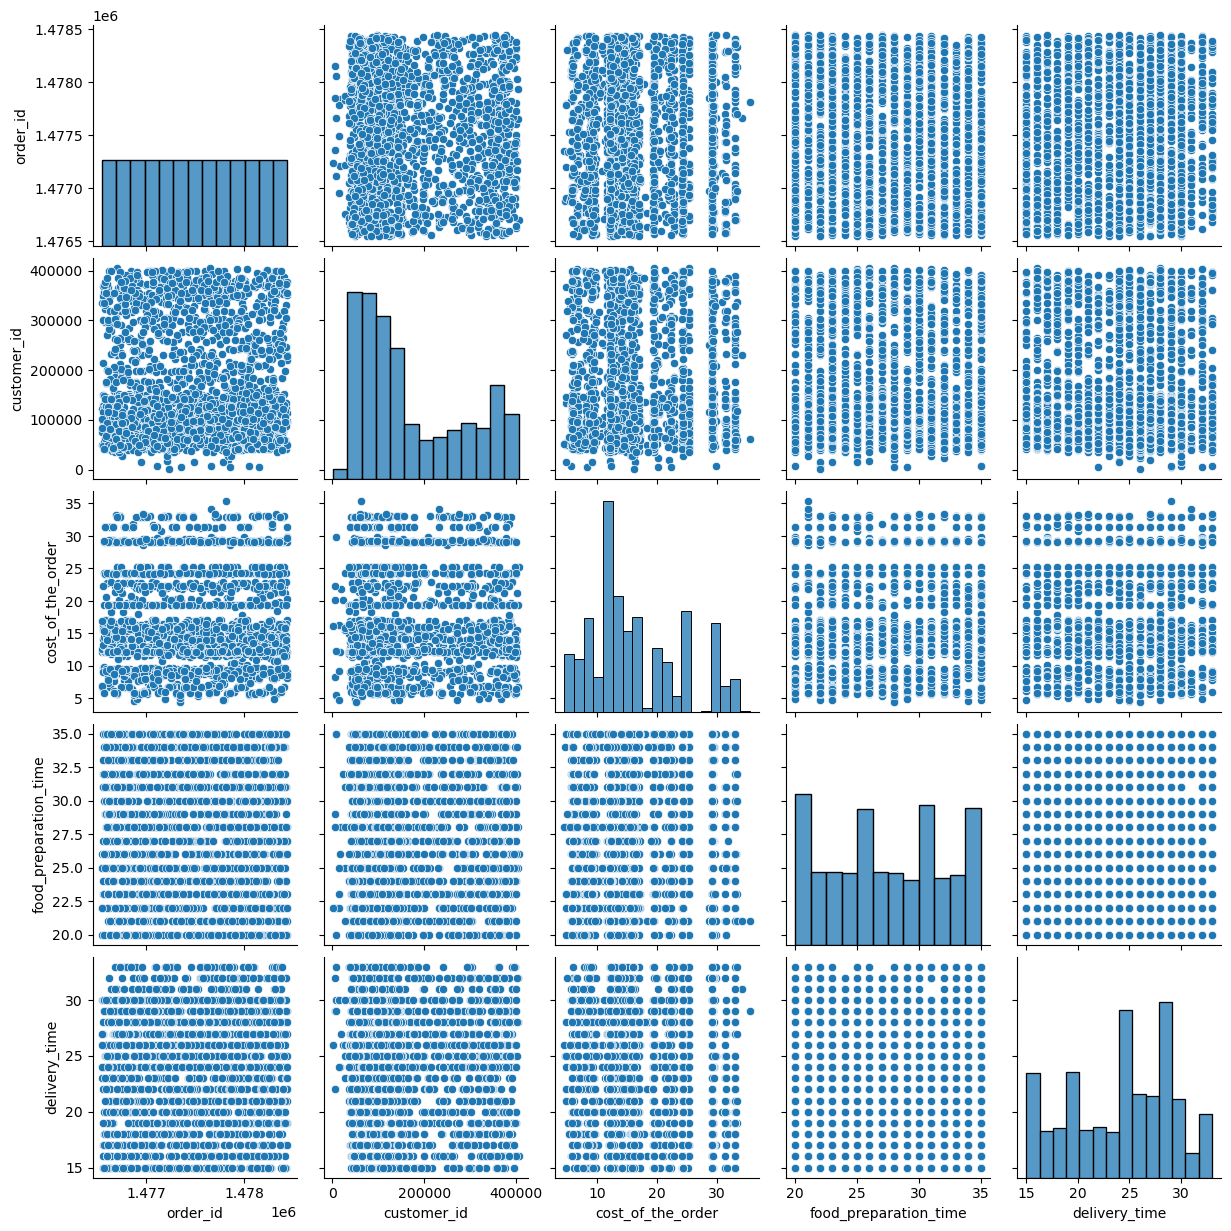

In [37]:
# set the figure size
plt.figure(figsize = (8,8))

# plot a pair plot
sns.pairplot(df_copy)

# display the plot
plt.show()

**Observations:** I created a pairplot to explore the relationships between each of the variables to determine whether there are any variables that appear overtly related. Aside from total time being related to delivery time and food preparation time (which are both variables that contribute to the calculation of this value), there does not appear to be any overtly apparent correlations in the data. This is supported numerically by the correlation matrix as well. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [38]:
df_filtered = df.copy()
df_filtered.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [39]:
df_filtered = df_filtered.drop(index=df_filtered[df_filtered['rating'] == 'Not given'].index)
df_filtered.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [42]:
df_filtered['rating'] = df_filtered['rating'].astype('int64')

In [43]:
df_agg = df_filtered.groupby('restaurant_name').agg({'rating':['count','mean']})
df_agg.head()

rating     
                 count mean
restaurant_name            
'wichcraft           1  5.0
12 Chairs            2  4.5
5 Napkin Burger      2  4.0
67 Burger            1  5.0
Amma                 2  4.5

In [44]:
promotional_restaurants = df_agg[(df_agg['rating', 'count'] > 50) & (df_agg['rating', 'mean'] > 4)]

print(promotional_restaurants)

                          rating          
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
First, I created a new copy of the dataset. Then, I removed all values where a rating was "not given", since it is not possible to use those entries to calculate the mean using the filter function. Given the values under the column "rating" was previously stored as a string, we need to convert the data type in the "rating" column into an integer in order to calculate the mean. 

I then used a groupby function to group the rating and restaurant names together. Then, I used the .agg function to create an aggregate of all ratings in which the total count is greater than 50 and the average rating is greater than 4. 

The restaurants that would qualify for this promotion are: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop. 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [45]:
df_revenue20 = df_copy[df_copy['cost_of_the_order'] > 20]
revenue_over_20 = df_revenue20['cost_of_the_order'].sum()*0.25
print(revenue_over_20)

3688.7275


In [46]:
df_revenue5 = df_copy[(df_copy['cost_of_the_order'] > 5) & (df_copy['cost_of_the_order'] <= 20)]
revenue_over_5 = df_revenue5['cost_of_the_order'].sum()*0.15
print(revenue_over_5)

2477.5755000000004


In [47]:
total_revenue = revenue_over_20 + revenue_over_5
print(total_revenue)

6166.303


#### Observations:
First, I filtered all orders where the cost was >$20 and then wrote a function to calculate 25 percent of the sum of the cost of those orders to calculate the total revenue for orders over 20. I then did the same for orders over 5, but excluded all values over 20 so that they are not re-calculated to calculate the total revenue for orders over 5 but less than or equal to 20. Then, I calculated the total revenue by calculating the sum of the two values. 

The net revenue generated by the company across all orders is $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [49]:
df_copy["total time"] = df_copy["food_preparation_time"] + df["delivery_time"]
df_copy

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,54


In [50]:
df_time60 = df_copy[df_copy['total time'] > 60]
df_time60 = (sum(df_copy['total time'] > 60) / 1898) * 100

print(f"{df_time60:.2f}%")

10.54%


#### Observations:
First, I created a new column in the dataset that calculated the total time for each order, which is the sum of food_preparation_time + delivery_time. I filtered all values that were greater or equal to $60 and then calculated the percentage of orders. 

10.64% of orders take more than 60 minutes to get delivered from the time the order is placed. 

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [51]:
df_copy.groupby('day_of_the_week').agg({'delivery_time':['mean']})

,delivery_time
,mean
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
Using the groupby and .agg functions, on both the day_of_the_week and delivery_time I can calculate the average delivery time. 

The average delivery time is **28.34 on weekdays** and **22.47 minutes on weekends**. I visualized the relationship between these two variables earlier on the violin plot, which also indicated that **the average delivery time appears higher on weekdays as opposed to weekends**. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [52]:
corr_matrix = df_filtered.corr()

corr_matrix

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
order_id,1.000000,0.003798,0.047080,0.006308,0.026206,0.003977
customer_id,0.003798,1.000000,-0.002110,0.007753,-0.035754,-0.009076
cost_of_the_order,0.047080,-0.002110,1.000000,0.033983,0.035445,-0.075892
rating,0.006308,0.007753,0.033983,1.000000,-0.006083,-0.009804
food_preparation_time,0.026206,-0.035754,0.035445,-0.006083,1.000000,-0.008635
delivery_time,0.003977,-0.009076,-0.075892,-0.009804,-0.008635,1.000000


### Conclusions:
*  Delivery time on weekdays are higher than delivery time on weekends. 
*  There are fewer orders placed on weekdays than on weekends. 
*  Food preparation time on weekdays does not significantly differ than food preparation time on weekends.
*  The highest percentage of orders are for American, Japanese, Italian, and Chinese cuisine. 
*  Food preparation time does not appear to correlate with cuisine type. 
*  More customers do not provide ratings as opposed to any numerical rating gathered. 
*  Ratings do not appear to correlate with delivery time and do not significantly correlate with any other integer variable in this dataset.  

### Recommendations:

**Customer Ratings:** 
*  The app can provide discounts to incentivize customers to provide ratings (i.e. for every 5 ratings provided by the customer, they can receive 10% off their next meal). This may incentivize customers to more consistently provide ratings for their customer experience and incentivize them to continue using this food delivery service. 
*  Given that ratings do not appear to correlate with delivery time, I would gather more data to assess why customer ratings vary. 

**Weekdays vs. Weekends:** 
*  There are fewer orders placed on weekdays and also a higher delivery time on weekdays. While we cannot say that the increased delivery time is causing fewer customers to order food on weekdays, they may be correlated. 
*  I would recommend the company invests more time into gather data on factors that may influence orders placed on weekdays vs. weekends and delivery time on weekdays vs. weekends. 
*  Perhaps the subsequent data gathered indicates that there are fewer available drivers on weekdays. Hiring more drivers may increase total revenue accumulated on weekdays. 

**Cuisine Type:** 
*  Given that the highest percentage of orders placed are for American, Japanese, Italian, and Chinese cuisine, the company can consider increasing the number of contracts with restaurants offering these cuisines to further drive revenue. 

---